In [59]:
from langchain_openai import ChatOpenAI
from dotenv import load_dotenv
from agent import build_langgraph_rag
from IPython.display import Image, display
import base64
import os
import sys

parent_dir = os.path.abspath(os.path.join(os.getcwd(), ".."))
sys.path.append(parent_dir)

from retriever import load_hybrid_retriever
from retriever import load_hybrid_retriever

import warnings

# Ignore uniquement les warnings de dépréciation LangChain
warnings.filterwarnings("ignore")

load_dotenv()

True

In [56]:
llm = ChatOpenAI(
        api_key=os.getenv("OPENAI_API_KEY"),
        model="gpt-4o",
        temperature=0.1)

retriever = load_hybrid_retriever(
        index_path="../../vectorstore/faiss_vectorestore_v2",
        pickle_path="../../vectorstore/documents_v2.pkl",
        model_path="../../bge-m3"
    )

In [60]:
compiled_graph = build_langgraph_rag(retriever, llm)  

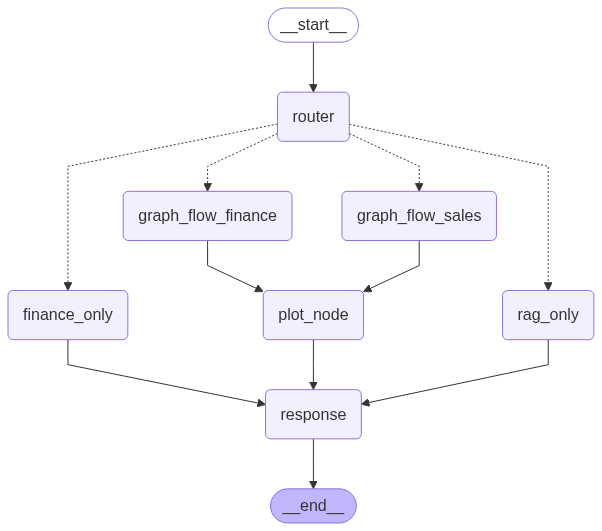

In [61]:
Image(compiled_graph.get_graph().draw_mermaid_png())

In [52]:
result = compiled_graph.invoke({"question": "Quel était le prix de l’action Renault lors des résultats 2023 ?"})
print(result['final_response'])

Router decision: finance_only
Current route: finance_only
Je ne connais pas la réponse.


In [53]:
print(result['rag_result'])

Je ne connais pas la réponse.


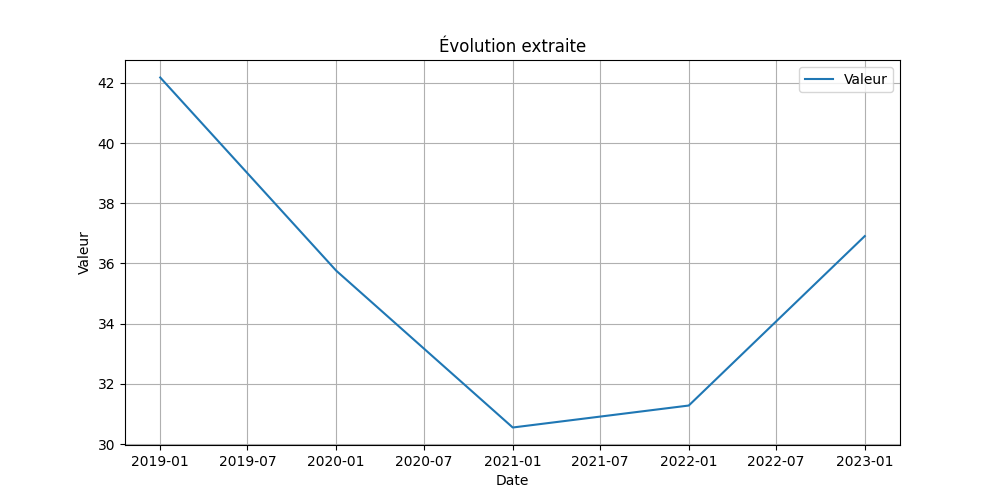

In [49]:
base64_data = result['final_response']  # ou ta variable encodée
display(Image(data=base64.b64decode(base64_data.split(",")[1])))